<a href="https://colab.research.google.com/github/parthava-adabala/learning/blob/main/01PyTorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.8.0+cu126'

In [ ]:
#Data preparation
weight = 0.5
bias = 0.2

X = torch.arange(0,10,0.2).unsqueeze(1)
y = weight * X + bias

X[:5], y[:5]

(tensor([[0.0000],
         [0.2000],
         [0.4000],
         [0.6000],
         [0.8000]]),
 tensor([[0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000]]))

In [ ]:
# Splitting data into training and testing sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size":14})


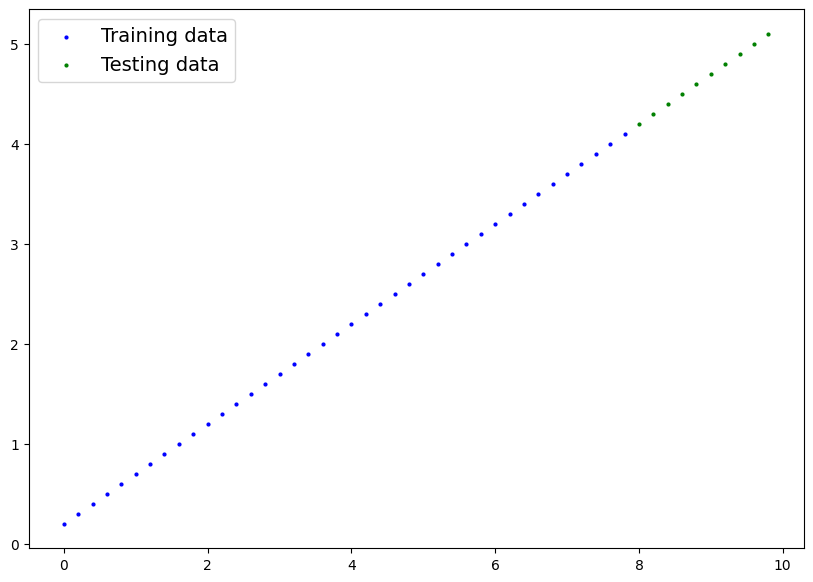

In [ ]:
plot_predictions()

# pytorch model

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [ ]:
torch.manual_seed(42)
model_0 = LinearRegression()
list(model_0.parameters()), model_0.state_dict(), model_0.parameters()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]),
 <generator object Module.parameters at 0x7bef30d7e6c0>)

In [ ]:
#Make predictions
with torch.inference_mode(): # inference mode is faster for predictions because it does not use gradients tracking
  y_preds = model_0(X_test)
y_preds

tensor([[2.8223],
        [2.8897],
        [2.9570],
        [3.0243],
        [3.0917],
        [3.1590],
        [3.2264],
        [3.2937],
        [3.3610],
        [3.4284]])

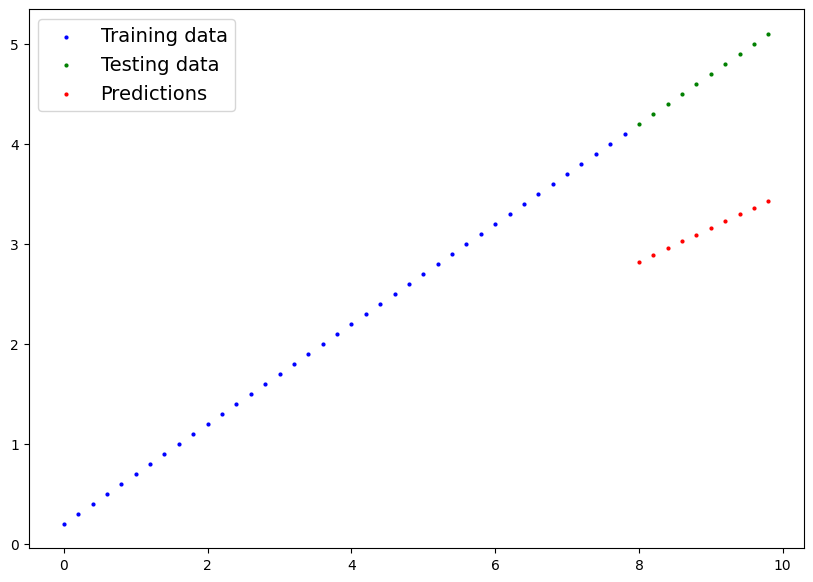

In [ ]:
plot_predictions(predictions=y_preds)

#Train a model

In [ ]:
# set up loss function
loss_fn = nn.L1Loss()

# set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)



In [ ]:
# Building a training loop
torch.manual_seed(42)
epochs = 200

#track experiments
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch}, Loss: {loss}, Test loss: {test_loss}")
    model_0.state_dict()

Epoch: 0, Loss: 0.7080981731414795, Test loss: 1.488936185836792
Epoch: 10, Loss: 0.5459984540939331, Test loss: 1.1318371295928955
Epoch: 20, Loss: 0.3838988244533539, Test loss: 0.7747377157211304
Epoch: 30, Loss: 0.22179913520812988, Test loss: 0.41763830184936523
Epoch: 40, Loss: 0.059699464589357376, Test loss: 0.06053924560546875
Epoch: 50, Loss: 0.010650591924786568, Test loss: 0.01520991325378418
Epoch: 60, Loss: 0.008955279365181923, Test loss: 0.011250495910644531
Epoch: 70, Loss: 0.007315681781619787, Test loss: 0.007646417710930109
Epoch: 80, Loss: 0.012875666841864586, Test loss: 0.0074255941435694695
Epoch: 90, Loss: 0.011081570759415627, Test loss: 0.0011643886100500822
Epoch: 100, Loss: 0.00940917618572712, Test loss: 0.004746198654174805
Epoch: 110, Loss: 0.011708076111972332, Test loss: 0.002134561538696289
Epoch: 120, Loss: 0.011684213764965534, Test loss: 0.003672361373901367
Epoch: 130, Loss: 0.01439298503100872, Test loss: 0.0008089542388916016
Epoch: 140, Loss: 0

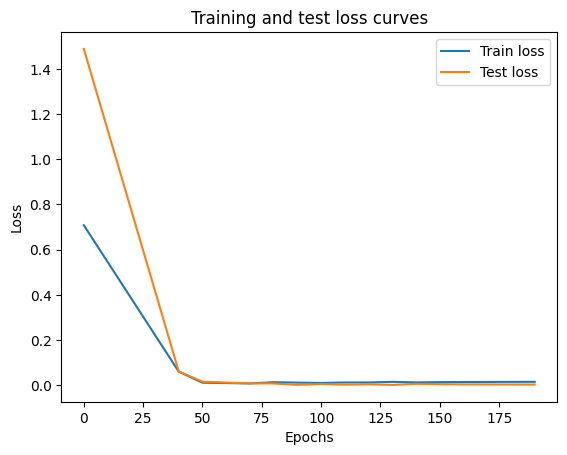

In [ ]:
plt.plot(epoch_count, torch.tensor(loss_values, requires_grad=False).numpy(), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

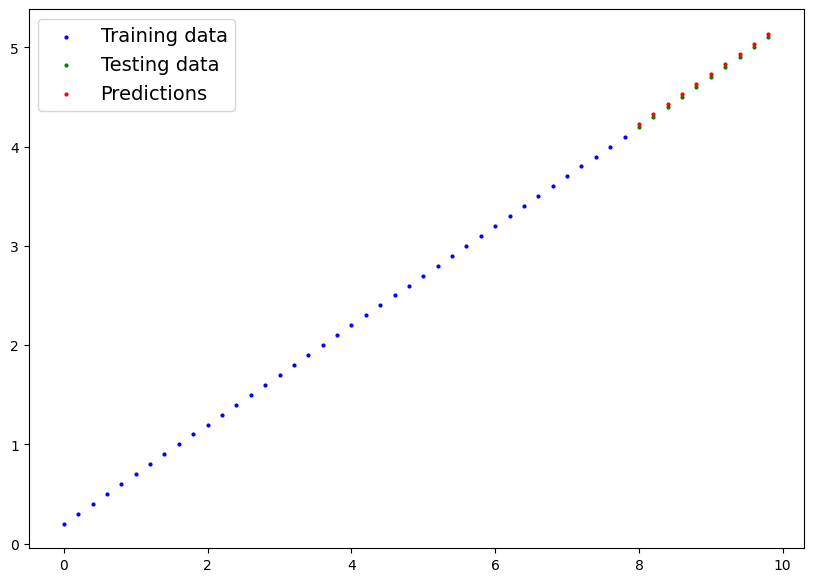

In [ ]:

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [218]:
# Save model
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [219]:
# Load model
loaded_model_0 = LinearRegression()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [220]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5037])), ('bias', tensor([0.2000]))])

In [221]:
# Make predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[4.2298],
        [4.3305],
        [4.4313],
        [4.5320],
        [4.6327],
        [4.7335],
        [4.8342],
        [4.9350],
        [5.0357],
        [5.1365]])

In [222]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [224]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.layer_1(x)

In [226]:
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('layer_1.weight', tensor([[-0.4869]])),
             ('layer_1.bias', tensor([0.5873]))])

In [230]:
next(model_1.parameters()).device

device(type='cpu')